In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ipc_values = {}
baseline_ipc = None

In [4]:
# Parsing log files for baseline and different prefetch degrees
base_dir = "../output/"
log_files = {
    "baseline": "no-no-1core.log",  # Log with no prefetcher
    "2": "/task1/no-asp-1core_degree_2.log",
    "4": "/task1/no-asp-1core_degree_4.log",
    "6": "/task1/no-asp-1core_degree_6.log",
    "8": "/task1/no-asp-1core_degree_8.log"
}

In [5]:
# Function to parse a Champsim log file
def parse_champsim_log(log_file):
    with open(log_file, 'r') as file:
        log_data = file.read()

        # Find IPC
        ipc_match = re.search(r'CPU 0 cumulative IPC: ([\d\.]+)', log_data)
        ipc = float(ipc_match.group(1)) if ipc_match else 0

    return ipc

In [6]:
# Iterate through each log file and store IPC and MPKI values
for degree, log_file in log_files.items():
    ipc = parse_champsim_log(base_dir + log_file)
    ipc_values[degree] = ipc

# Set baseline IPC and MPKI
baseline_ipc = ipc_values['baseline']

# Normalize IPC (speedup) to baseline
speedup_values = {degree: ipc / baseline_ipc for degree, ipc in ipc_values.items() if degree != 'baseline'}

In [7]:
speedup_values

{'2': 1.000972422108989,
 '4': 1.0091089431009301,
 '6': 1.0130834974663983,
 '8': 1.0182072779606717}

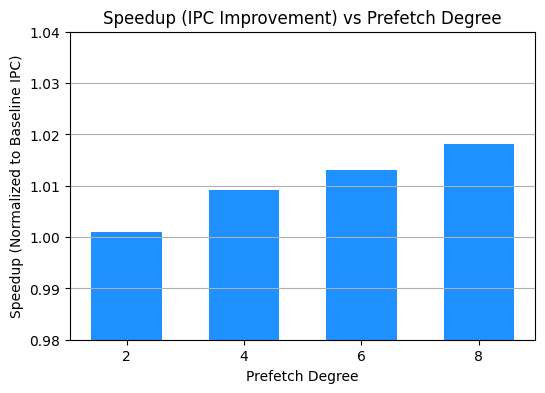

In [10]:
# Plotting graphs

# Bar plot for Speedup (IPC improvement)
plt.figure(figsize=(6, 4))
degrees = list(speedup_values.keys())
speedup = list(speedup_values.values())


plt.ylim(0.98, 1.04)

plt.title('Speedup (IPC Improvement) vs Prefetch Degree')
plt.xlabel('Prefetch Degree')
plt.ylabel('Speedup (Normalized to Baseline IPC)')

plt.grid(True, axis='y')
plt.bar(degrees, speedup, width = 0.6, color='dodgerblue')
# Show the plots
plt.show()
